Saving 5.jpg to 5.jpg


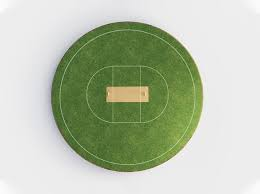

Pitch detection complete. Image saved as 'output_pitch_only.jpg'.


In [ ]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import files

# Step 1: Upload the image
uploaded = files.upload()

# Step 2: Read the uploaded image
for file_name in uploaded.keys():
    image = cv2.imread(file_name)

# Check if image is loaded correctly
if image is None:
    print("Error: Image not loaded correctly.")
else:
    # Step 3: Detect the pitch

    # Convert the image to grayscale for easier processing
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect edges to find the pitch
    edges = cv2.Canny(gray_image, 50, 150)

    # Use Hough Line Transform to detect the pitch (lines of the pitch)
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)

    # Draw the detected lines (pitch lines)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 3)  # Green lines to mark the pitch

    # Step 4: Display the final image with detected pitch
    cv2_imshow(image)

    # Save the processed image if needed
    cv2.imwrite('output_pitch_only.jpg', image)

    print("Pitch detection complete. Image saved as 'output_pitch_only.jpg'.")
